In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
def f1(x1, x2):
    eps = 1e-8  # para evitar divisão por zero
    t1 = (np.cos(2*np.pi*x1) / (1 - (4*x1)**2 + eps)) * (np.sin(np.pi*x1)/(np.pi*x1 + eps))
    t2 = (np.cos(2*np.pi*x2) / (1 - (4*x2)**2 + eps)) * (np.sin(np.pi*x2)/(np.pi*x2 + eps))
    return t1 * t2

def f2(x1, x2):
    return 16*x1**2 + x1*x2 + 8*x2**2 - x1 - x2 + np.log(1 + x1**2 + x2**2)

In [ ]:
# Para f1(x1,x2) ∈ [-1, 1]
x1_f1 = np.linspace(-1, 1, 200)
x2_f1 = np.linspace(-1, 1, 200)
x1g_f1, x2g_f1 = np.meshgrid(x1_f1, x2_f1)
X_f1 = np.c_[x1g_f1.ravel(), x2g_f1.ravel()]
y_f1 = f1(X_f1[:, 0], X_f1[:, 1])

# Para f2(x1,x2) ∈ [-10, 10]
x1_f2 = np.linspace(-1, 1, 200)
x2_f2 = np.linspace(-1, 1, 200)
x1g_f2, x2g_f2 = np.meshgrid(x1_f2, x2_f2)
X_f2 = np.c_[x1g_f2.ravel(), x2g_f2.ravel()]
y_f2 = f2(X_f2[:, 0], X_f2[:, 1])


In [ ]:
Xf1_train, Xf1_val, yf1_train, yf1_val = train_test_split(X_f1, y_f1, test_size=0.2, random_state=42)
Xf2_train, Xf2_val, yf2_train, yf2_val = train_test_split(X_f2, y_f2, test_size=0.2, random_state=42)

def criar_modelo():
    model = Sequential([
        Dense(64, input_dim=2, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1)  # saída escalar
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Treinar modelo para f1
modelo_f1 = criar_modelo()
hist_f1 = modelo_f1.fit(Xf1_train, yf1_train, validation_data=(Xf1_val, yf1_val),
                        epochs=100, batch_size=32, verbose=0)

# Treinar modelo para f2
modelo_f2 = criar_modelo()
hist_f2 = modelo_f2.fit(Xf2_train, yf2_train, validation_data=(Xf2_val, yf2_val),
                        epochs=100, batch_size=32, verbose=0)


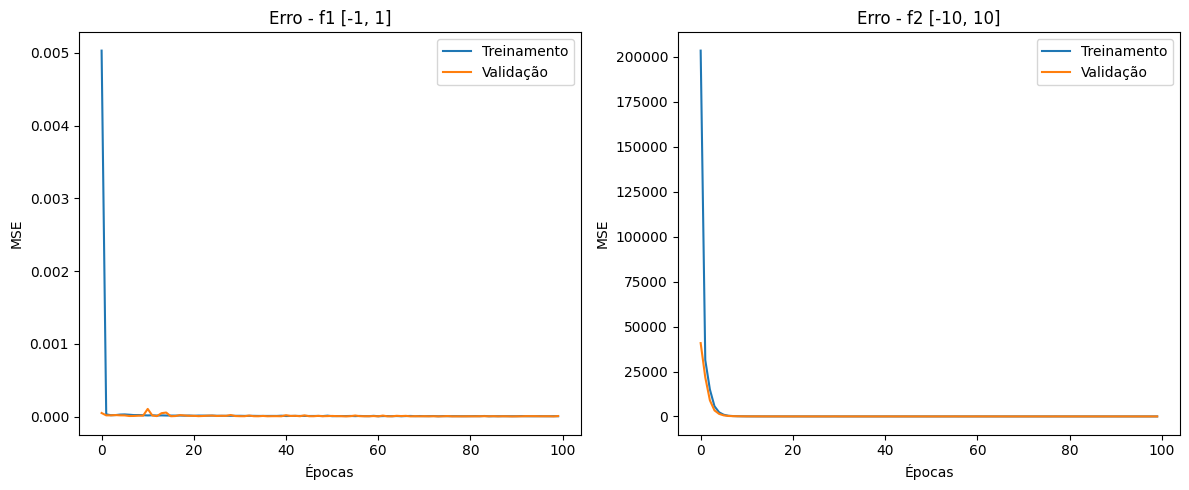

In [ ]:
# 📌 Etapa 6: Gráficos de Erro (Loss)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(hist_f1.history['loss'], label='Treinamento')
plt.plot(hist_f1.history['val_loss'], label='Validação')
plt.title('Erro - f1 [-1, 1]')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()


plt.subplot(1,2,2)
plt.plot(hist_f2.history['loss'], label='Treinamento')
plt.plot(hist_f2.history['val_loss'], label='Validação')
plt.title('Erro - f2 [-1, 1]')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


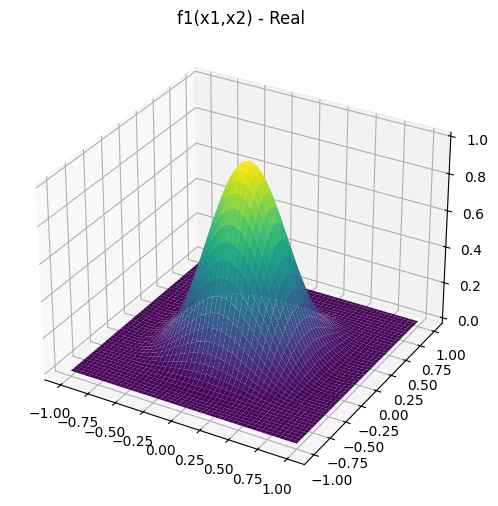

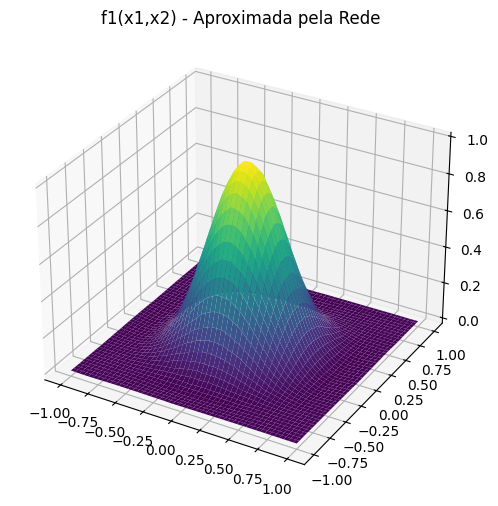

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


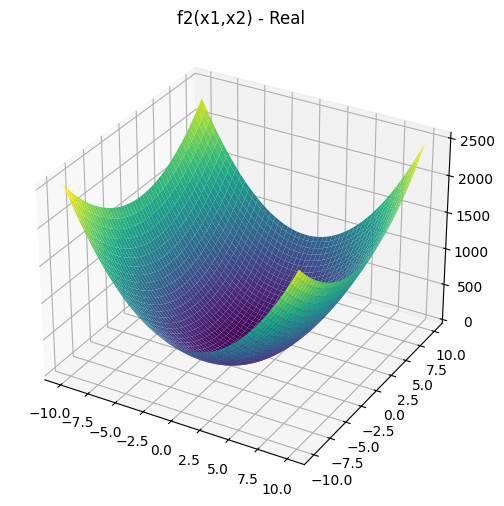

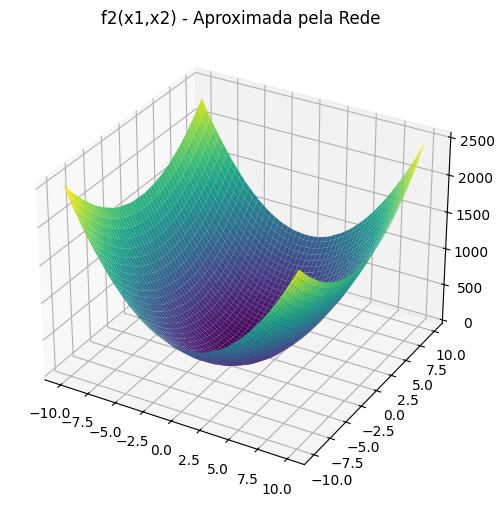

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_surface(title, x1g, x2g, z):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1g, x2g, z, cmap='viridis')
    ax.set_title(title)
    plt.show()

# f1
z1_real = y_f1.reshape(x1g_f1.shape)
z1_pred = modelo_f1.predict(X_f1).reshape(x1g_f1.shape)

plot_surface("f1(x1,x2) - Real", x1g_f1, x2g_f1, z1_real)
plot_surface("f1(x1,x2) - Aproximada pela Rede", x1g_f1, x2g_f1, z1_pred)

# f2
z2_real = y_f2.reshape(x1g_f2.shape)
z2_pred = modelo_f2.predict(X_f2).reshape(x1g_f2.shape)

plot_surface("f2(x1,x2) - Real", x1g_f2, x2g_f2, z2_real)
plot_surface("f2(x1,x2) - Aproximada pela Rede", x1g_f2, x2g_f2, z2_pred)

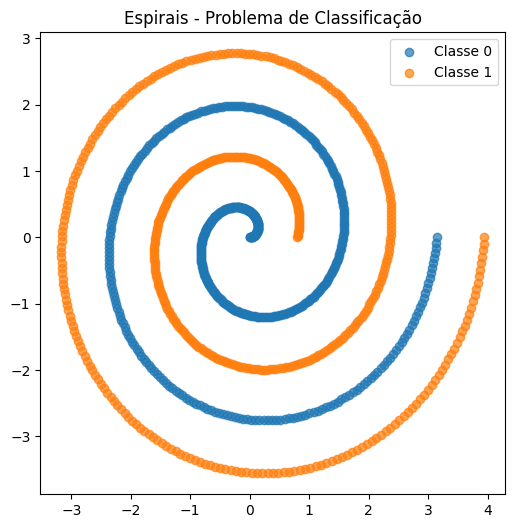

Acurácia no teste: 0.7100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


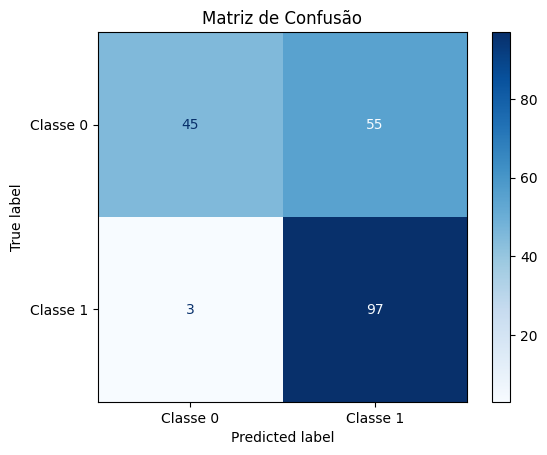

In [ ]:
# Etapa 1: Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# Etapa 2: Geração dos dados das espirais
def gerar_espiral(theta, deslocamento=0, label=0):
    r = theta / 4 + deslocamento
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.c_[x, y], np.full(theta.shape, label)

# Parâmetros da espiral
theta = np.linspace(0, 4 * np.pi, 500)  # controla o "comprimento" das espirais

# Espiral 1 (classe 0) e Espiral 2 (classe 1)
espiral1, y1 = gerar_espiral(theta, deslocamento=0.0, label=0)
espiral2, y2 = gerar_espiral(theta, deslocamento=0.8, label=1)

# Juntar os dados
X = np.vstack([espiral1, espiral2])
y = np.hstack([y1, y2])

# Visualização inicial
plt.figure(figsize=(6,6))
plt.scatter(espiral1[:,0], espiral1[:,1], label="Classe 0", alpha=0.7)
plt.scatter(espiral2[:,0], espiral2[:,1], label="Classe 1", alpha=0.7)
plt.legend()
plt.title("Espirais - Problema de Classificação")
plt.show()

# Etapa 3: Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# One-hot encoding para a saída (obrigatório para classificação com softmax)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Etapa 4: Criação do modelo
modelo = Sequential([
    Input(shape=(2,)),
    Dense(128, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(2, activation='softmax')  # duas classes
])
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Etapa 5: Treinamento
hist = modelo.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                  epochs=100, batch_size=32, verbose=0)

# Etapa 6: Avaliação
loss, acc = modelo.evaluate(X_test, y_test_cat, verbose=0)
print(f"Acurácia no teste: {acc:.4f}")

# Etapa 7: Matriz de confusão
y_pred_probs = modelo.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()


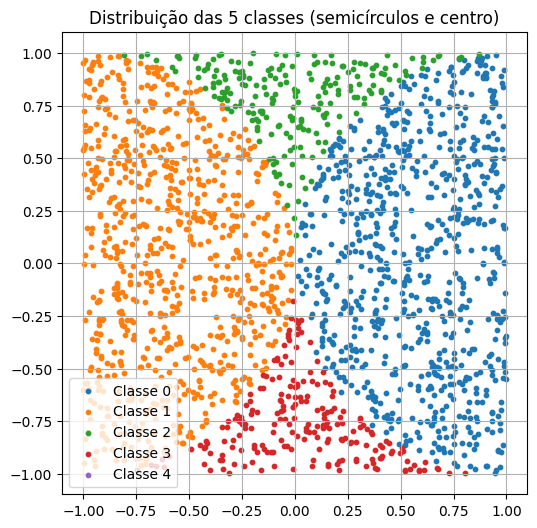

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9936    0.9936    0.9936       157
           1     0.9814    0.9937    0.9875       159
           2     0.9756    0.9524    0.9639        42
           3     0.9756    0.9524    0.9639        42

    accuracy                         0.9850       400
   macro avg     0.9816    0.9730    0.9772       400
weighted avg     0.9850    0.9850    0.9849       400



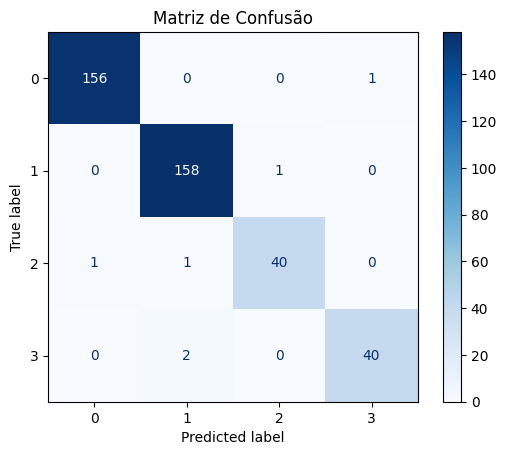

In [ ]:
# Etapa 1: Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# Etapa 2: Função para gerar os dados
def gerar_dados(n_amostras=2000, raio=1.0):
    X = np.random.uniform(-1, 1, size=(n_amostras, 2))
    y = []

    for x, y_ in X:
        if x >= 0 and (x - 1)**2 + y_**2 <= raio**2:       # direita
            y.append(0)
        elif x <= 0 and (x + 1)**2 + y_**2 <= raio**2:     # esquerda
            y.append(1)
        elif y_ >= 0 and x**2 + (y_ - 1)**2 <= raio**2:    # cima
            y.append(2)
        elif y_ <= 0 and x**2 + (y_ + 1)**2 <= raio**2:    # baixo
            y.append(3)
        else:
            y.append(4)                                    # centro (fora dos arcos)
    return X, np.array(y)

# Etapa 3: Geração e visualização dos dados
X, y = gerar_dados(n_amostras=2000)

plt.figure(figsize=(6,6))
for classe in range(5):
    plt.scatter(X[y == classe][:,0], X[y == classe][:,1], label=f'Classe {classe}', s=10)
plt.title('Distribuição das 5 classes (semicírculos e centro)')
plt.legend()
plt.grid(True)
plt.show()

# Etapa 4: Pré-processamento
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

# Etapa 5: Modelo MLP
model = Sequential([
    Input(shape=(2,)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(5, activation='softmax')  # 5 classes
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Etapa 6: Treinamento
hist = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                 epochs=100, batch_size=32, verbose=0)

# Etapa 7: Avaliação
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, digits=4))

# Etapa 8: Matriz de Confusão (corrigida)
labels_presentes = sorted(np.unique(np.concatenate([y_test, y_pred])))
cm = confusion_matrix(y_test, y_pred, labels=labels_presentes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


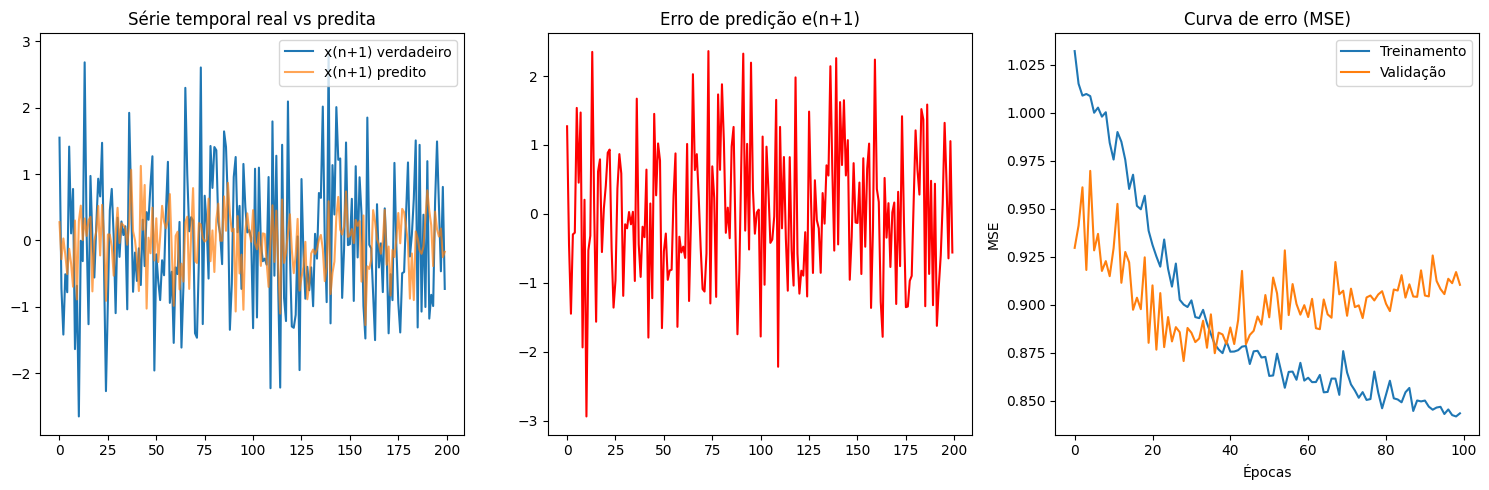

In [ ]:
# Etapa 1: Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Etapa 2: Geração da série temporal
np.random.seed(42)
N = 1000  # tamanho da série
beta = 0.5
v = np.random.normal(0, 1, N)
x = np.zeros(N)

# Calcula x(n) com base na fórmula
for n in range(2, N):
    x[n] = v[n] + beta * v[n-1] * v[n-2]

# Etapa 3: Janela deslizante (x(n), x(n-1), x(n-2), x(n-3)) -> x(n+1)
X_data = []
y_data = []

for n in range(3, N - 1):
    X_data.append([x[n], x[n-1], x[n-2], x[n-3]])
    y_data.append(x[n+1])

X_data = np.array(X_data)
y_data = np.array(y_data)

# Etapa 4: Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Etapa 5: Normalização
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).ravel()

# Etapa 6: MLP
model = Sequential([
    Input(shape=(4,)),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Etapa 7: Treinamento
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data=(X_test_scaled, y_test_scaled),
                    epochs=100, batch_size=32, verbose=0)

# Etapa 8: Predição
y_pred_scaled = model.predict(X_test_scaled).ravel()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = y_test  # já está em escala original

# Etapa 9: Erro de predição
erro = y_true - y_pred

# Etapa 10: Gráficos
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_true, label='x(n+1) verdadeiro')
plt.plot(y_pred, label='x(n+1) predito', alpha=0.7)
plt.title("Série temporal real vs predita")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(erro, color='red')
plt.title("Erro de predição e(n+1)")

plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title("Curva de erro (MSE)")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()

plt.tight_layout()
plt.show()
